**NOTEBOOK 1**

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

In this exercise it was asked to test the Pseudo-Random Number generator on a uniformly distributed random variable r in [0,1), evaluating its mean value and variance in the same interval. The statistical uncertainties of these quantities were computed exploiting the blocking method technique which consists in dividing the data in blocks, computing the mean value for each block and then using these values to estimate the uncertainties of the quantities one is interested in. The usefulness of this techinque resides in the reduction of the correlation between data in different blocks. If we consider M Monte Carlo steps, N blocks and L = M/N Monte Carlo steps in each block, the method could be resumed with  the following equations:
Variance: 
    $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
   
With:
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$ where $$A_{i} $$ stands for the mean value of the block. Finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
import os 

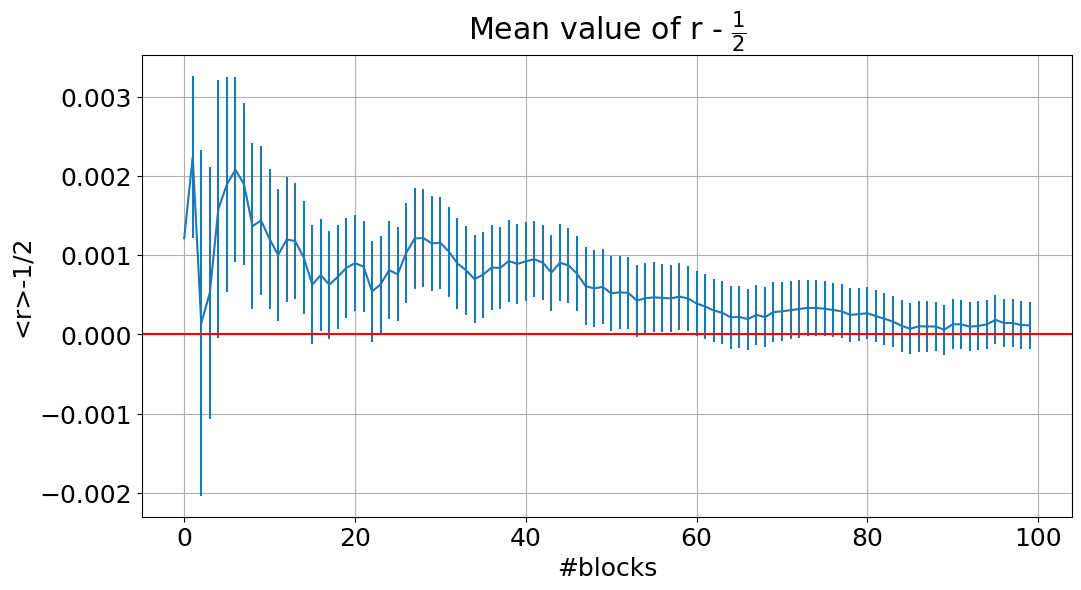

In [10]:
media, varianza = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_01/exercise_1_01/results_1.dat", unpack =True, usecols=(0,1))

M = 1000000 #Number of throws
N = 100 #Number of blocks
L = (int)(M/N) #Number of throws per block
x = np.arange(N) 
mu = 0.5
var = 1/12

plt.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"]= (11,7)
plt.figure(figsize=(12,6))
plt.errorbar(x,media-mu,yerr=varianza)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel('#blocks')
plt.ylabel('<r>-1/2')
plt.title(r'Mean value of r - $\frac{1}{2}$')
plt.grid(True)
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

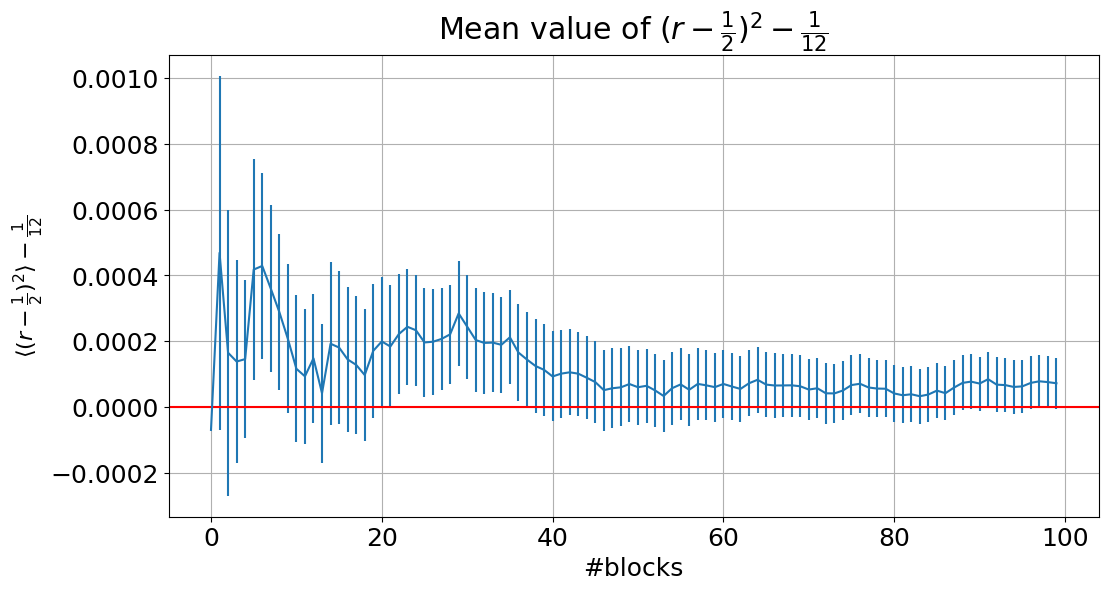

In [12]:
media, varianza = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_01/exercise_1_01/results_2.dat", unpack =True, usecols=(0,1))

plt.figure(figsize=(12,6))
plt.errorbar(x,media-var,yerr=varianza)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel('#blocks')
plt.ylabel(r'$\langle (r - \frac{1}{2})^2\rangle - \frac{1}{12} $', fontsize=16)
plt.title(r'Mean value of $(r-\frac{1}{2})^2 - \frac{1}{12}$')
plt.grid(True)
plt.show()

It is clear from the plots that both the mean values converge to the desired value and, as one may expect, the statistical uncertainties decrease as the number of blocks considered increases. 

In the following exercise it was asked to verify through the $\chi^2$ test that the values of r generated from the Pseudo-Random Number generator are uniformly distributed in the interval [0,1]. 

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

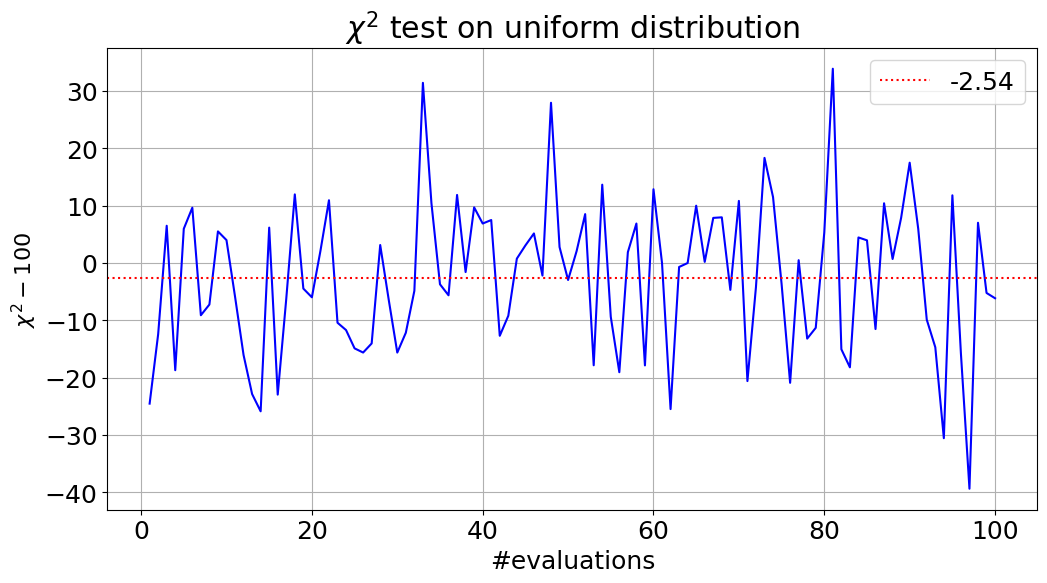

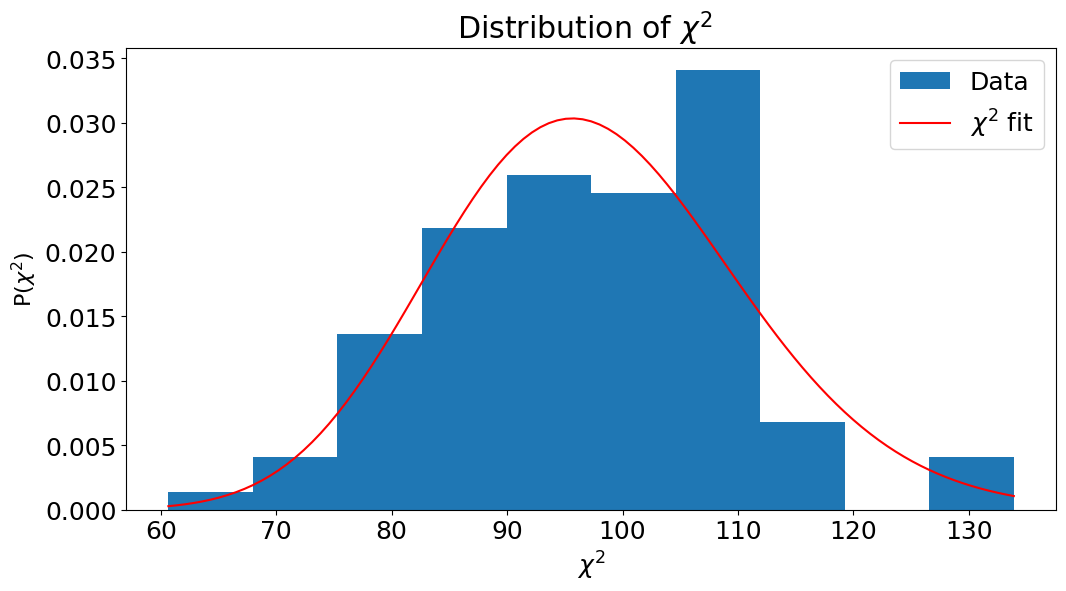

In [22]:
chi_quadro=np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_01/exercise_1_01/results_3.dat", unpack =True)

y = np.arange(N)+1
exp_dev = round(np.mean(chi_quadro-100),2)

plt.figure(figsize=(12,6))
plt.plot(y,chi_quadro-100, color="blue")
plt.axhline(y=exp_dev, linestyle='dotted', label=exp_dev, color='r')
plt.xlabel('#evaluations')
plt.ylabel(r'$\chi^2 - 100$', fontsize=16)
plt.title(r'$\chi^2$ test on uniform distribution')
plt.legend()
plt.grid(True)
plt.show()

k1, loc, x_1 = scipy.stats.chi2.fit(chi_quadro, floc=0)
xmin=np.min(chi_quadro)
xmax=np.max(chi_quadro)
x = np.linspace(xmin,xmax,101)
#Histogram
plt.figure(figsize=(12,6))
plt.hist(chi_quadro,bins=10, density=True, label='Data')
#Fit
W1=scipy.stats.chi2(k1,loc=0, scale=x_1) 
plt.plot(x, W1.pdf(x), label="$\chi^2$ fit", color="red")
plt.xlabel('$\chi^2$')
plt.ylabel(r'P($\chi^2$)', fontsize=16)
plt.title(r'Distribution of $\chi^2$  ')
plt.legend()

In the first plot the value of the discrepancy $\chi^2 - 100$ oscillates around the mean of the discrepancy (red dashed line). These oscillations around the expected value seem to be acceptable and therefore one may conclude that the r-values are correctly extracted from a uniform distribution. Nevertheless, in the histogram one sees that the distribution of the "empirical" data shows a peak around 110 and therefore does not match with the peak one should expect (in the red line, $\chi^2 = 100$). In the end, one is induced to reject the hypothesis and conclude that the r-values are not properly sampled from a uniform distribution. This may be in line with the sense of the Pseudo-Random Generator: in fact, this generator relies on a deterministic algorithm (module-based) in which the period of the numbers is of the order of $2^{48}$. 

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

In this exercise it was asked to extend the Pseudo-Random generator adding different probability distributions to extract values from. In particular, the exercise requested the possibility to sample values from an exponential and a Cauchy-Lorentz distribution. The sampling from these probability distributions was realized through the method of the inversion of the cumulative distribution. It was therefore asked for a validity check of the Central Limit Theorem which states that, given a generic probability distribution with finite mean and variance, the probability distribution of the sum of N i.i.d variables ($N \to +\infty) $  extracted from the original PDF is a Gaussian, independently of the functional form of the original PDF. For a PDF whose variance is not finite there is a generalized Central Limit Theorem which states that the limit distribution is a Cauchy-Lorentz. 
This was done for a uniform, an exponential and a Cauchy-Lorentz distribution with increasing N (1, 2, 10, 100), where N is the number of samples extracted from the distribution. 

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

**Fig.1 - Standard dice**

Text(0, 0.5, 'Distribution of $S_N$')

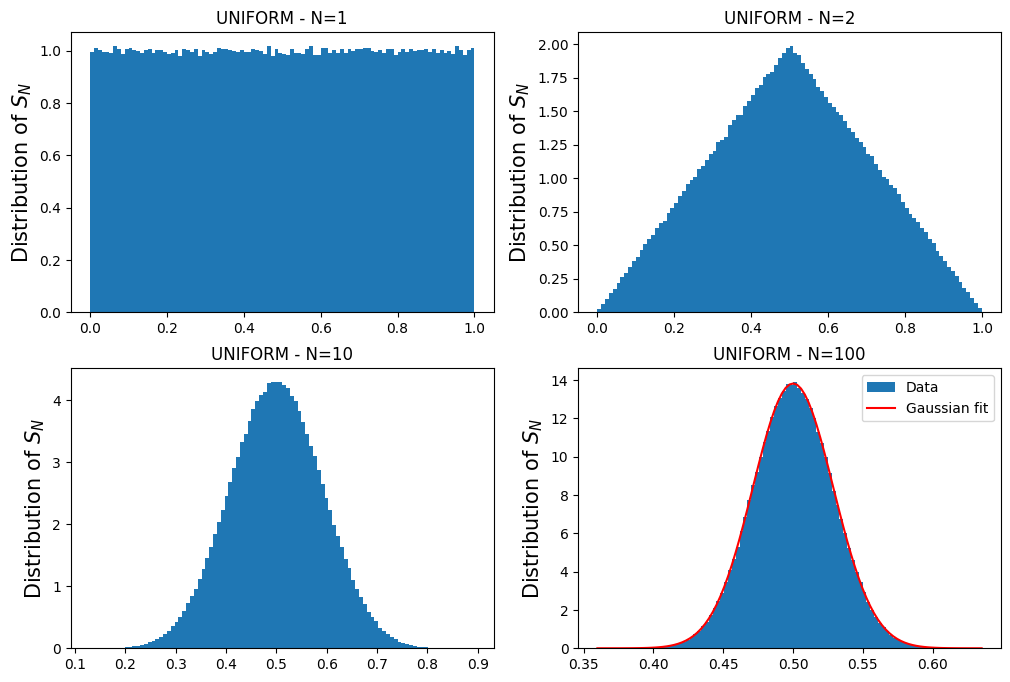

In [5]:
plt.rcParams.update({'font.size': 10})

N_1, N_2, N_10, N_100 = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_01/exercise_1_02/results_3.dat", unpack =True, usecols=(0,1,2,3))

fig = plt.figure(figsize=(12,8))

#Fit
mu, sigma = scipy.stats.norm.fit(N_100)
N=scipy.stats.norm(loc=mu,scale=sigma) 
xmin=np.min(N_100)
xmax=np.max(N_100)
x = np.linspace(xmin,xmax,101)

ax_1 = fig.add_subplot(2, 2, 1)
ax_1.hist(N_1, bins=100, density=True)
ax_1.set_title("UNIFORM - N=1")
ax_1.set_ylabel(fr"Distribution of $S_N$", fontsize=15)
 
ax_2 = fig.add_subplot(2, 2, 2)
ax_2.hist(N_2, bins=100, density=True)
ax_2.set_title("UNIFORM - N=2")
ax_2.set_ylabel(fr"Distribution of $S_N$", fontsize=15)

ax_3 = fig.add_subplot(2, 2, 3)
ax_3.hist(N_10, bins=100, density=True)
ax_3.set_title("UNIFORM - N=10")
ax_3.set_ylabel(fr"Distribution of $S_N$", fontsize=15)

ax_4 = fig.add_subplot(2, 2, 4)
ax_4.hist(N_100, bins=100, density=True, label="Data")
ax_4.plot(x, N.pdf(x), label="Gaussian fit", color="red")
ax_4.legend()
ax_4.set_title("UNIFORM - N=100")
ax_4.set_ylabel(fr"Distribution of $S_N$", fontsize=15)

**Fig.2 - Exponential dice**

Text(0, 0.5, 'Distribution of $S_N$')

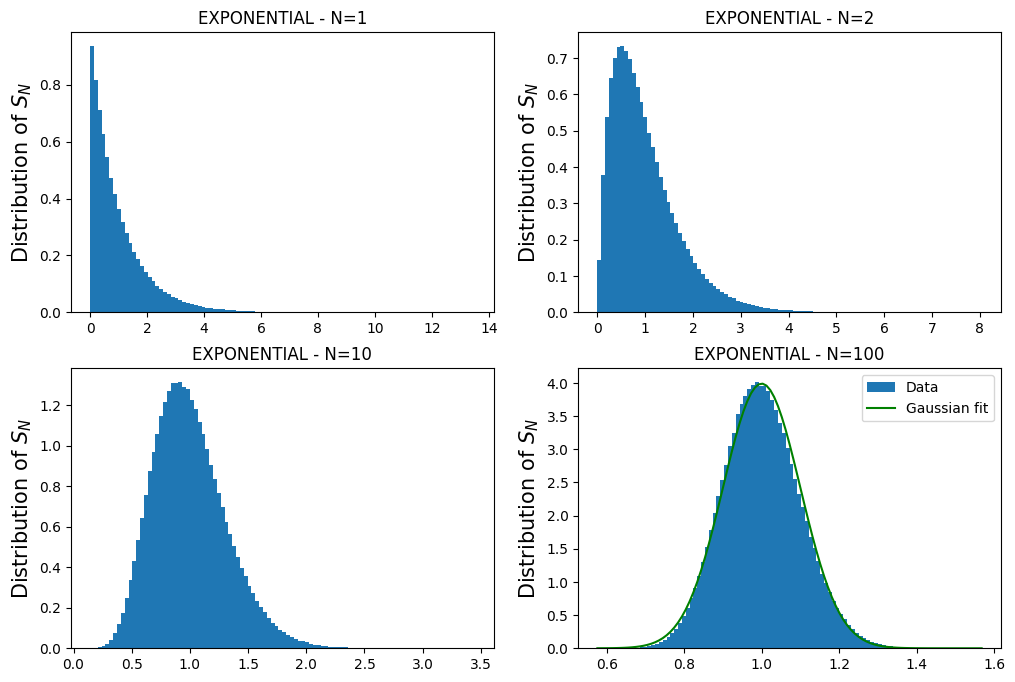

In [6]:
plt.rcParams.update({'font.size': 10})

N_1, N_2, N_10, N_100 = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_01/exercise_1_02/results_1.dat", unpack =True, usecols=(0,1,2,3))

fig = plt.figure(figsize=(12,8))

#Fit
mu, sigma = scipy.stats.norm.fit(N_100)
N=scipy.stats.norm(loc=mu,scale=sigma) 
xmin=np.min(N_100)
xmax=np.max(N_100)
x = np.linspace(xmin,xmax,101)

ax_1 = fig.add_subplot(2, 2, 1)
ax_1.hist(N_1, bins=100, density=True)
ax_1.set_title("EXPONENTIAL - N=1")
ax_1.set_ylabel(fr"Distribution of $S_N$", fontsize=15)
 
ax_2 = fig.add_subplot(2, 2, 2)
ax_2.hist(N_2, bins=100, density=True)
ax_2.set_title("EXPONENTIAL - N=2")
ax_2.set_ylabel(fr"Distribution of $S_N$", fontsize=15)

ax_3 = fig.add_subplot(2, 2, 3)
ax_3.hist(N_10, bins=100, density=True)
ax_3.set_title("EXPONENTIAL - N=10")
ax_3.set_ylabel(fr"Distribution of $S_N$", fontsize=15)

ax_4 = fig.add_subplot(2, 2, 4)
ax_4.hist(N_100, bins=100, density=True, label="Data")
ax_4.plot(x, N.pdf(x), label="Gaussian fit", color="green")
ax_4.legend()
ax_4.set_title("EXPONENTIAL - N=100")
ax_4.set_ylabel(fr"Distribution of $S_N$", fontsize=15)

**Fig.3 - Lorentzian dice**

Text(0, 0.5, 'Distribution of $S_N$')

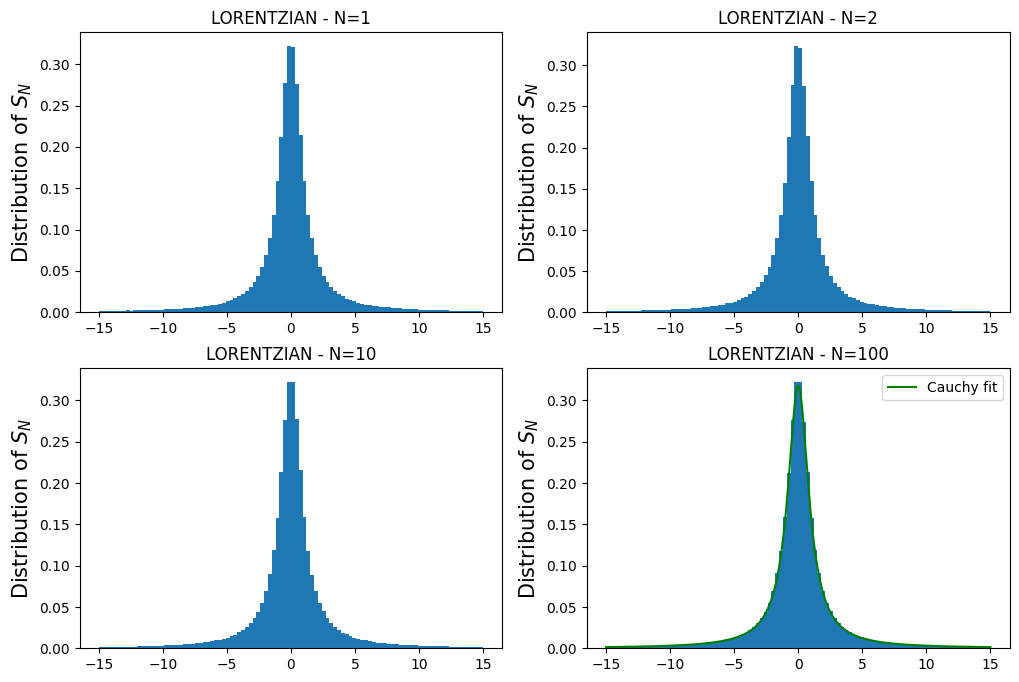

In [7]:
plt.rcParams.update({'font.size': 10})

N_1, N_2, N_10, N_100 = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_01/exercise_1_02/results_2.dat", unpack =True, usecols=(0,1,2,3))

fig = plt.figure(figsize=(12,8))

#Fit
mean, tau = scipy.stats.cauchy.fit(N_100)
x=np.linspace(-15,15, 1000)

ax_1 = fig.add_subplot(2, 2, 1)
ax_1.hist(N_1, range=(-15,15), bins=100, density=True)
ax_1.set_title("LORENTZIAN - N=1")
ax_1.set_ylabel(fr"Distribution of $S_N$", fontsize=15)
 
ax_2 = fig.add_subplot(2, 2, 2)
ax_2.hist(N_2, range=(-15,15), bins=100, density=True)
ax_2.set_title("LORENTZIAN - N=2")
ax_2.set_ylabel(fr"Distribution of $S_N$", fontsize=15)

ax_3 = fig.add_subplot(2, 2, 3)
ax_3.hist(N_10, range=(-15,15), bins=100, density=True)
ax_3.set_title("LORENTZIAN - N=10")
ax_3.set_ylabel(fr"Distribution of $S_N$", fontsize=15)

ax_4 = fig.add_subplot(2, 2, 4)
ax_4.hist(N_100, range=(-15,15), bins=100, density=True)
ax_4.plot(x, scipy.stats.cauchy.pdf(x, mean, tau), label="Cauchy fit", color="green")
ax_4.legend()
ax_4.set_title("LORENTZIAN - N=100")
ax_4.set_ylabel(fr"Distribution of $S_N$", fontsize=15)

Considering the first two plots above, it is evident that increasing the numbers of samples N corresponds to a better fit with limit distribution which, in these two cases (uniform and exponential), is the Gaussian distribution. In the N = 100 one sees a good agreement between the Gaussian distribution fit and the "empirical" data. This last consideration also holds for the Cauchy-Lorentz distribution even though in this case, as the variance is not finite, the generalized Central Limit Theorem applies and therefore the last fit N = 100 involves the Cauchy-Lorentz limit distribution. 

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

It was considered a needle of length L = 1, a spacing among lines d = 2 and $N = 10^{6}$ throws.

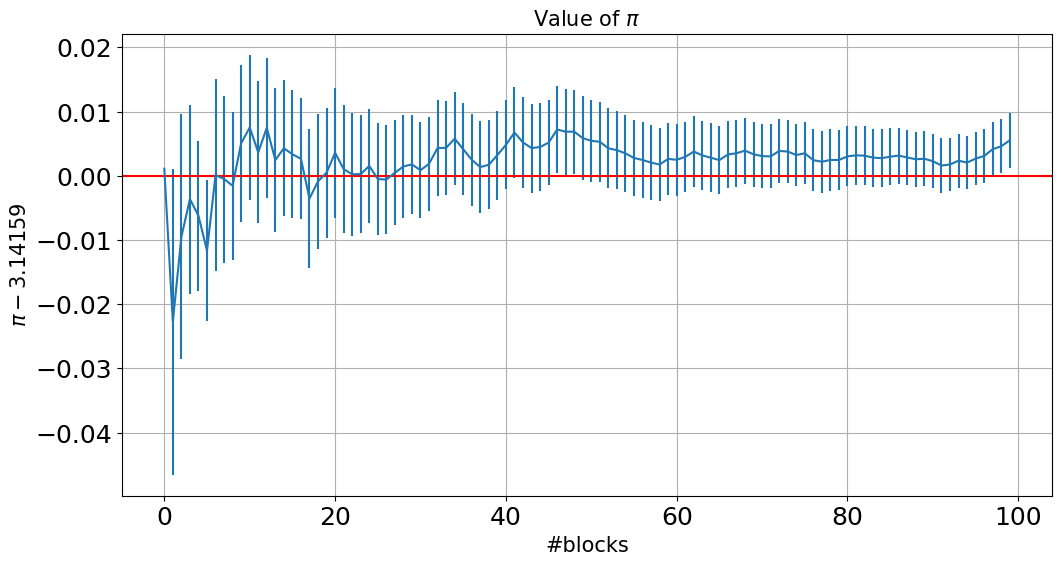

In [23]:
pi, pi_err=np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_01/exercise_1_03/results_1.dat", unpack =True, usecols=(0,1))

M = 100000 #Number of throws
N = 100 #Number of blocks
L = (int)(M/N)#Number of throws per block
x = np.arange(N) 

plt.figure(figsize=(12,6))
plt.errorbar(x,pi-math.pi,yerr=pi_err)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel('#blocks', fontsize=15)
plt.ylabel('$\pi - 3.14159$', fontsize=15)
plt.title(r'Value of $\pi$', fontsize=15)
plt.grid(True)
plt.show()

As one can see from the reported plot, the estimation of $\pi$ with the Buffon's experiment agrees with the known value. 